# Import libraries & data

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
ecommerce_retail = pd.read_excel('/content/drive/MyDrive/ecommerce retail.xlsx')

In [ ]:
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
!pip install dataprep
from dataprep.eda import create_report

# I. Clean & Prepare data

## EDA:
- Duplicated rows: 5268 -> drop duplicate
- `InvoiceNo` : bắt đầu bằng chữ C - Next step: Lọc các giao dịch bị huỷ ( giá trị bắt đầu bằng chữ C)
- Incorrect values: `Quantity` (Negative), `UnitPrice` (Nagative) -> Next step: remove
- Missing values: `CustomerID` (vì mô hình RFM cần phân tích theo khách hàng) -> Next step: Remove, `Description` 0.3% -> Next step: ignore
- Incorrect data types: `Customer ID` (float)--> chuyển thành String


In [ ]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
ecommerce_retail.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
create_report(ecommerce_retail)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Remove duplicate
ecommerce_retail = ecommerce_retail.drop_duplicates()
ecommerce_retail.duplicated().sum()

0

In [ ]:
# Remove InvoiceNo start with letter C
ecommerce_retail = ecommerce_retail[~ecommerce_retail['InvoiceNo'].str.startswith('C',na=False)]
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527390 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    527390 non-null  object        
 1   StockCode    527390 non-null  object        
 2   Description  525936 non-null  object        
 3   Quantity     527390 non-null  int64         
 4   InvoiceDate  527390 non-null  datetime64[ns]
 5   UnitPrice    527390 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      527390 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.2+ MB


In [ ]:
ecommerce_retail['StockCode'].str.len().value_counts()

,StockCode
6.0,50462
4.0,1134
3.0,709
7.0,385
1.0,328
2.0,142
12.0,46
8.0,31
9.0,16


In [ ]:
# Remove negative values in 'Quantity' & 'UnitPrice'
ecommerce_retail = ecommerce_retail[(ecommerce_retail['Quantity']>0) & (ecommerce_retail['UnitPrice']>0)]

In [ ]:
# Remove missing values in 'CustomerID'
ecommerce_retail = ecommerce_retail.dropna(subset=['CustomerID'])

In [ ]:
# Change data types in 'CustomerID'
ecommerce_retail['CustomerID']=ecommerce_retail['CustomerID'].astype(int).astype(str)

In [ ]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
create_report(ecommerce_retail)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# create a 'Revenue' column
ecommerce_retail['Revenue']=ecommerce_retail['Quantity'] * ecommerce_retail['UnitPrice']
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


# II. Calculate R,F,M


In [ ]:
# Calculate Rencency
ecommerce_retail['Recency'] =(pd.to_datetime('2011-12-31')- ecommerce_retail.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,393
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,393
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,21
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,21
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,21
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,21


In [ ]:
# Calculate frequency
frequency = ecommerce_retail.groupby('CustomerID')['InvoiceNo'].count().reset_index(name='Frequency')
frequency.shape

(4338, 2)

In [ ]:
# Calculate Monetery
monetery = ecommerce_retail.groupby('CustomerID')['Revenue'].sum().reset_index(name='Monetery')
monetery.shape

(4338, 2)

In [ ]:
# Merge frequency and Monetery
fm = pd.merge(frequency,monetery,on='CustomerID')
fm.head()

,CustomerID,Frequency,Monetery
0,12346,1,77183.60
1,12347,182,4310.00
2,12348,31,1797.24
3,12349,73,1757.55
4,12350,17,334.40


In [ ]:
# Merge fm with Recency
rfm = pd.merge(ecommerce_retail[['CustomerID','Recency']], fm, on='CustomerID').drop_duplicates()
rfm.shape


(4338, 4)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetery
0,17850,393,297,5391.21
297,13047,52,172,3237.54
469,12583,23,247,7281.38
716,13748,116,28,948.25
744,15100,354,3,876.00
...,...,...,...,...
392610,13436,22,12,196.89
392622,15520,22,18,343.50
392640,13298,22,2,360.00
392642,14569,22,12,227.39


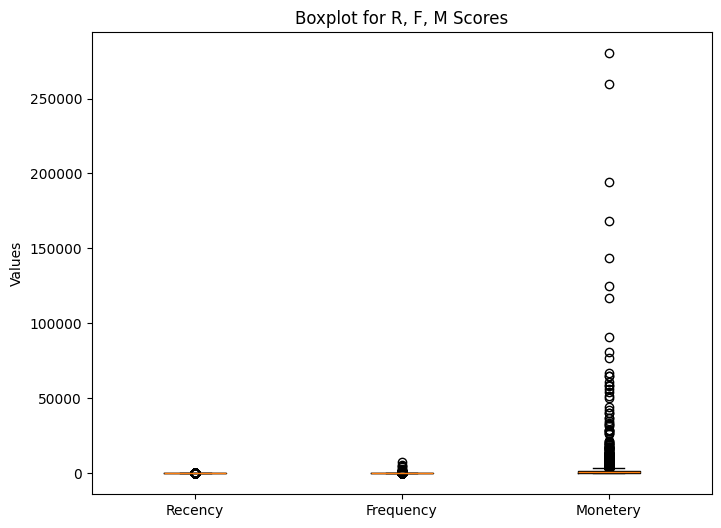

In [ ]:
#check outliers
# Tạo subplot với 3 hình
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # 1 hàng, 3 cột

# Vẽ boxplot cho Recency
axes[0].boxplot(rfm['Recency'])
axes[0].set_title('Recency')
axes[0].set_ylabel('Values')

# Vẽ boxplot cho Frequency
axes[1].boxplot(rfm['Frequency'])
axes[1].set_title('Frequency')
axes[1].set_ylabel('Values')

# Vẽ boxplot cho Monetery
axes[2].boxplot(rfm['Monetery'])
axes[2].set_title('Monetery')
axes[2].set_ylabel('Values')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# xử lý outliers

R_threshold = rfm['Recency'].quantile(0.90)
F_threshold = rfm['Frequency'].quantile(0.90)
M_threshold = rfm['Monetery'].quantile(0.90)

rfm_cleaned = rfm[(rfm['Recency'] <=  R_threshold) & \
                     (rfm['Frequency'] <=  F_threshold) & \
                     (rfm['Monetery'] <=  M_threshold)]

rfm_cleaned.shape

(3297, 4)

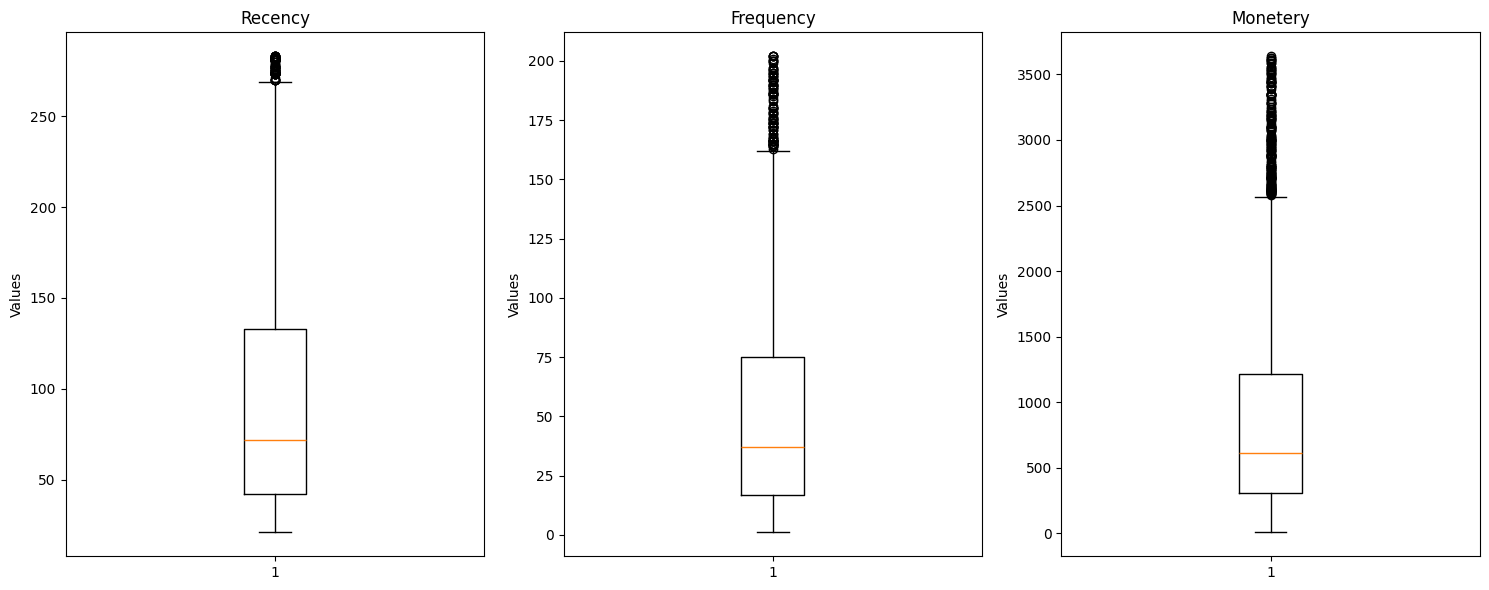

In [ ]:
# Tạo subplot với 3 hình
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # 1 hàng, 3 cột

# Vẽ boxplot cho Recency
axes[0].boxplot(rfm_cleaned['Recency'])
axes[0].set_title('Recency')
axes[0].set_ylabel('Values')

# Vẽ boxplot cho Frequency
axes[1].boxplot(rfm_cleaned['Frequency'])
axes[1].set_title('Frequency')
axes[1].set_ylabel('Values')

# Vẽ boxplot cho Monetery
axes[2].boxplot(rfm_cleaned['Monetery'])
axes[2].set_title('Monetery')
axes[2].set_ylabel('Values')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

# III. Quintile of RFM


In [ ]:
# Calcutale RMR Score
rfm_cleaned['R_score'] = pd.qcut(rfm_cleaned['Recency'], q=5, labels=[5,4,3,2,1])
rfm_cleaned['F_score'] = pd.qcut(rfm_cleaned['Frequency'], q=5, labels=[1,2,3,4,5])
rfm_cleaned['M_score'] = pd.qcut(rfm_cleaned['Monetery'], q=5, labels=[1,2,3,4,5])
rfm_cleaned['RFM_score']= rfm_cleaned['R_score'].astype(str) + rfm_cleaned['F_score'].astype(str) + rfm_cleaned['M_score'].astype(str)
rfm_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 297 to 392654
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3297 non-null   object  
 1   Recency     3297 non-null   int64   
 2   Frequency   3297 non-null   int64   
 3   Monetery    3297 non-null   float64 
 4   R_score     3297 non-null   category
 5   F_score     3297 non-null   category
 6   M_score     3297 non-null   category
 7   RFM_score   3297 non-null   object  
 8   Segment     3297 non-null   object  
dtypes: category(3), float64(1), int64(2), object(3)
memory usage: 190.6+ KB


# IV. RFM Segmentation:


In [ ]:
rfm_segments = {'Champions':['555','554','544','545','454','455','445'],
                'Loyal':['543','444','435','355','354','345','344','335'],
                'Potential Loyalist':['553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','352','351','342','341','333','323'],
                'New Customers': ['512', '511', '422', '421', '412', '411', '311'],
                'Promising':['525', '524', '523', '522', '521', '515', '514', '513', '425','424', '413','414','415', '315', '314', '313'],
                'Need Attention':['535', '534', '443', '434', '343', '334', '325', '324'],
                'About To Sleep':['331', '321', '312', '221', '213', '231', '241', '251'],
                'At Risk':['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'],
                'Can Not Lose Them':['155', '154', '144', '214','215','115', '114', '113'],
                'Hibernating customers':['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211'],
                'Lost Customers':['111', '112', '121', '131','141','151']}


In [ ]:
segment_mapping = {score: segment for segment, scores in rfm_segments.items() for score in scores}

In [ ]:
rfm_cleaned['Segment']=rfm_cleaned['RFM_score'].map(segment_mapping)

In [ ]:
rfm_cleaned

,CustomerID,Recency,Frequency,Monetery,R_score,F_score,M_score,RFM_score,Segment
297,13047,52,172,3237.54,4,5,5,455,Champions
716,13748,116,28,948.25,2,2,4,224,At Risk
3601,16098,108,67,2005.63,2,4,5,245,At Risk
3681,17420,71,30,598.83,3,3,3,333,Potential Loyalist
3952,16250,282,24,389.44,1,2,2,122,Hibernating customers
...,...,...,...,...,...,...,...,...,...
392610,13436,22,12,196.89,5,1,1,511,New Customers
392622,15520,22,18,343.50,5,2,2,522,Promising
392640,13298,22,2,360.00,5,1,2,512,New Customers
392642,14569,22,12,227.39,5,1,1,511,New Customers


#V. Visualization

In [ ]:
# Create treemap
segment_counts = rfm_cleaned['Segment'].value_counts().reset_index()
segment_counts.columns =['Segment','Count']
segment_counts


,Segment,Count
0,Hibernating customers,543
1,Champions,496
2,Potential Loyalist,443
3,At Risk,408
4,Loyal,289
5,New Customers,284
6,Lost Customers,275
7,Need Attention,162
8,Promising,148
9,About To Sleep,139


In [ ]:
import plotly.express as px
fig = px.treemap(segment_counts, path=['Segment'], values='Count', title='Customer Segment Treemap')
fig.show()

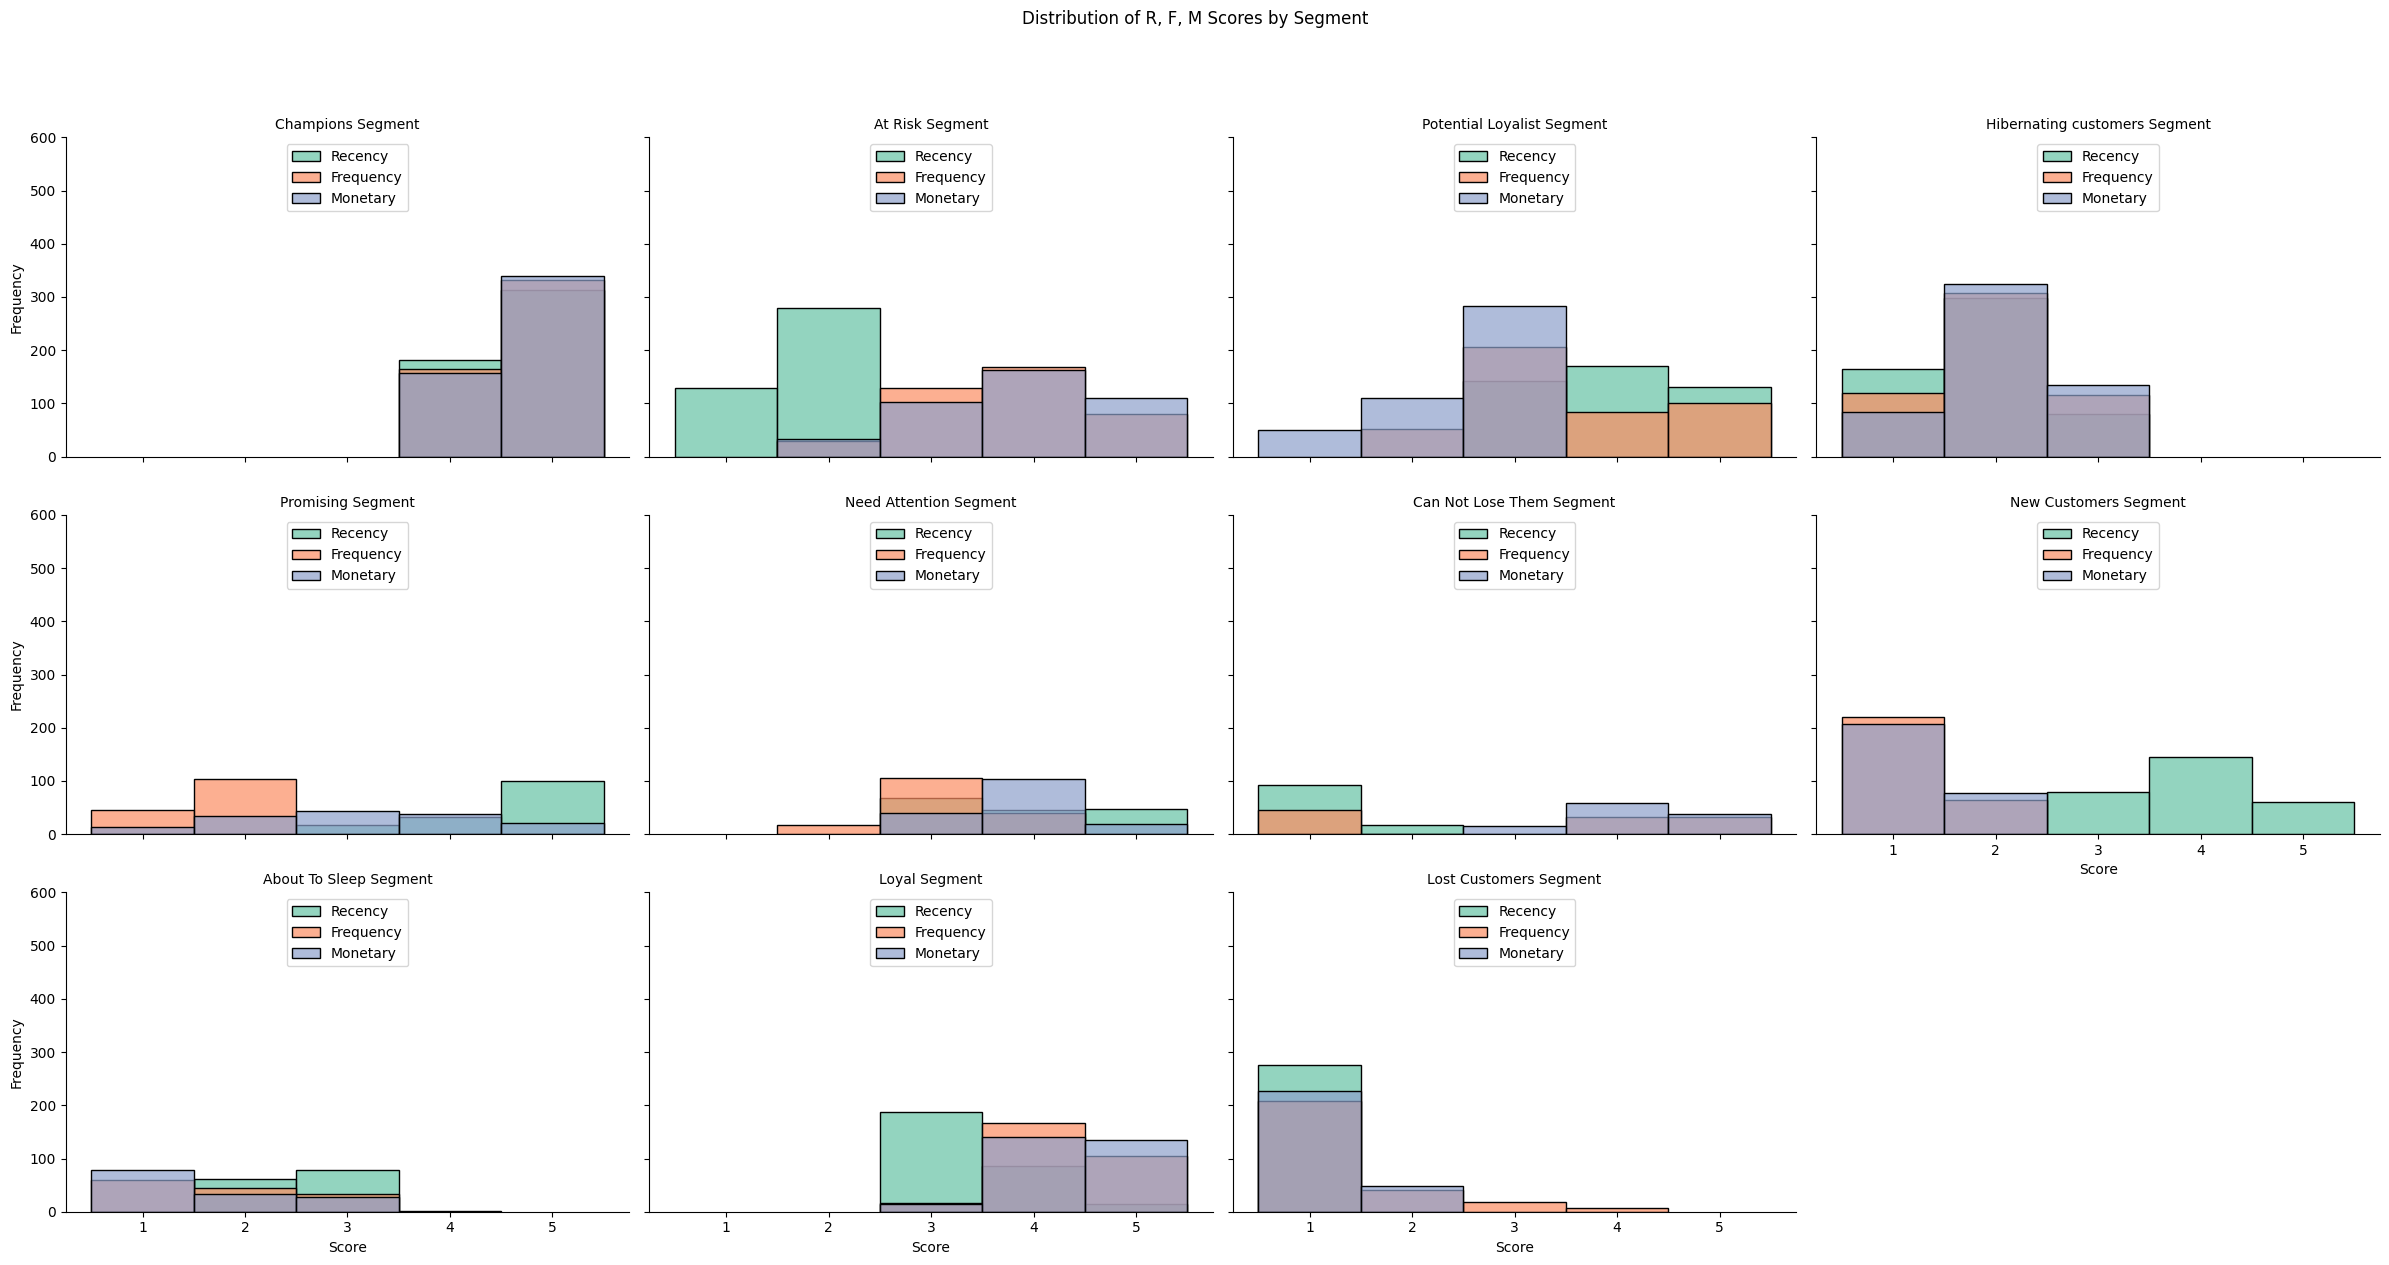

In [ ]:
# Vẽ Recency Score Distribution
g = sns.FacetGrid(rfm_cleaned, col="Segment", col_wrap=4, height=4, aspect=1.5)
g.map(sns.histplot, "R_score", color=sns.color_palette("Set2")[0], label="Recency", alpha=0.7)
g.map(sns.histplot, "F_score", color=sns.color_palette("Set2")[1], label="Frequency",alpha=0.7)
g.map(sns.histplot, "M_score", color=sns.color_palette("Set2")[2], label="Monetary",alpha=0.7)

# Thêm tiêu đề và nhãn
g.set_titles("{col_name} Segment")
g.set_axis_labels("Score", "Frequency")
g.fig.suptitle("Distribution of R, F, M Scores by Segment", y=1.05)

# Sử dụng legend
for ax in g.axes.flat:
    ax.set_ylim(0, 600)
    ax.legend(loc="upper center")

plt.tight_layout()
plt.show()

#VI. Phân tích hiện trạng của công ty và đưa ra gợi ý cho team Marketing

##6.1 Phân tích hiện trạng

**1. Nhóm đông:** Tập khách hàng lớn nhất, ảnh hướng đến tình hình kinh doanh của
công ty lớn nhất
**+ Hibernating Customers:** (543) nhóm khách ngủ đông, rất lâu không có giao dịch, tần suất mua hàng rất thấp, và giá trị giao dịch thấp --> cần tìm hiểu nguyên nhân và khẩn trương khắc phục, chuyển hướng nhóm khách hàng này thành các nhóm có hoạt động tích cực hơn.

**+ Champions** (496) là tập khách hàng mơ ước với 3 chỉ số R,F,M score đêu cao, và số lượng lớn. Mục tiêu duy nhất của nhóm đối tượng này là duy trì, giữu chân khahcs hàng bằng những ưu đãi riêng biệt chỉ dành riêng cho nhóm đối tượng này.

**+ At Risk**: (443) điểm mạnh nhóm này là giá trị giao dịch cao và tần suất mua hàng thường xuyên, tuy nhiên vì một lí do nào đó mà lần giao dịch gần nhất khá xa --> tìm hiểu nguyên nhân, đưa ra chiến lược để kéo khách hàng quay lại trước khi chuyển thành Hibernating Customers

**+ Potential Loyalist:** (408) tập khách hàng nổi bật ở tần suất mua hàng thường xuyên, và năng động, tuy nhiên giá trị đơn hàng ở mức trung bình thấp --> nghiên cứư, thực hiện khảo sát tìm ra nguyên nhân, để nâng cao giá trị đơn hàng, dịch chuyển sang tập khách LoyalCustomer.

**2. Nhóm ít**: Là tập không ảnh hưởng đến doanh số công ty, tuy nhiên sẽ là môi trường để công ty thử nghiệm các hình thức Marketing độc đáo

**+ Can not lose them:** (110): Tuy số lượng ít, nhưng khách hàng trong tập này chi tiêu cao, tần suất giao dịch không phải là chỉ số đánh giá ở tập KH này, tuy nhiên thì điểm cần cải thiện tập KH này cần có chiến lược Mraketing để kéo khách hàng nhớ đến thương hiệu, và kích thích tần suất mua hàng rõ nét hơn.

**+ About to sleep:** (139) thuộc nhóm nguy hiểm, cần có chiến lược kích thích KH quay lại trước khi chuyển thành nhóm Lost Customer.

**+ Promissing: (148)** Điểm sáng của nhóm này là có giao dịch mới, giá trị giao dịch, mục tiêu định hướng cho nhóm này là đẩy giá trị giao dịch cao hơn, tần suất mua nhiều hơn để nâng thành nhóm Loyal Customers

**+ Need Attention:(162)** là nhóm có giao dịch trung bình cao, tần suất mua hàng cũng ở mức trung bình, tuy nhiên có dấu hiệu tốt là có nhiều giao dịch mới --> dễ tác động bằng chiến lược Marketing để cải thiện chuyển thành nhóm KH chất lượng hơn.
- Quan sát trên biểu đồ phân bổ, có thể nhận ra, Need Attention có thể là nhóm Promissing phản ứng tốt với các chiến lược cửa công ty trước đó, từ đó đã cải thiện được chỉ số Monetary và Frenquency. Kế thừ chiến lược Marketing trước đó cho nhón Promissing.

***3. Nhóm có số lượng tương đối lớn***

**+ Loyal Customers:** (289) chỉ xếp sau nhóm Champions về giao dịch gần nhất, còn lại đây cũng được xem là tập khách hàng mơ ước mà công ty theo đuổi, nhiện vụ đầu tiên cần triển khai cho nhóm này là duy trì số lượng và rồi sau đó đẩy chỉ số Recency để chuyển sang nhóm Champions.

**+ New Customer:** (284) là tập có giao dịch gần nhất, được trải nghiệm sản phẩm dịch vụ mới nhất, dễ dàng phản ứng với các chiến dịch nhắm thu hút kích cầu của Marketing.

**+ Lost Customers:** (275) tuy có sô lượng tương đương với New Customers, nhưng lại là nhóm nguy hiểm nhất. Với nhóm KH này, cần có nỗ lực rất lớn để tìm hiểu nguyên nhân, thực hiện khảo sát. Vì kinh phí thực hiện các chiến dịch khôi phục sẽ là vấn đề để cân nhắc xem có nên chuyển hướng phân bổ nguồn lực, kinh phí kích thích nhóm khác thì dẽ dàng có kết quả thực tệ hơn. CÒn lại, xem nhóm này là những study case tránh lặp lại trong thời gian tương lai.








##6.2 Đề xuất chiến lược
Chiến lược chung:
-  KH nhận diện được thương hiệu rõ ràng
+ Truyền tải thông điệp nhất quán trên tất cả các kênh truyền thông
+ Tạo nội dung hữu ích, giải quyết vấn đề, chia sẽ kiến thưc chuyên môn thông qua các kênh (livestreams Tiktok, Youtube, Facebook)
- Chương trình khuyến mãi đa dạng, hấp hẫn để thu hút KH và kích thích mua sắm
- Thu thập khảo sát, phản hồi thường xuyên để luôn có chiến lược, và giải pháp, phản ứng kịp thời cho từng nhóm đối tươngj khách hàng
1. Nhóm Khách hàng trọng tâm:
**+ Champions, loyal custome**: duy trì lòng trung thành, tăng giá trị vòng đời KH.Đặc biệt chú trọng đến trải nghiệm dịch vụ KH, chăm sóc khách hàng  này như:
+ Xây dựng cộng đồng, sự kiện độc quyền trong buổi ra mắt sp mới, hoặc tiệc tri ấn khách hàng
+ Ưu đãi độc quyền: được trải nghiệm, mua hàng sớm, quà tặng sinh nhật.
+ CUng cấp dịch vụ cham sóc KH tốt nhất, ưu tiên giải quyết các vấn đề của Champions

**+ Hibernating Customers,About to sleep:** với mục tiêu đánh thức và tăng tỉ lệ quay lại mua hàng cần:
+ Tìm hiểu nguyên nhân và phân nhóm theo nhân khẩu học, hành vi mua hàng và thời gian không hoặt động bao lâu -> từ đó cá nhân hoá nội dung gởi mail, tin nhắn trong cac dịp ra mắt sp mới, tổ chức các chương trình khuyến mãi giảm giá sâu (kích thích mua hàng bằng ưu đãi lớn), quà tặng kèm, miễn phí vận chuyển(giảm rào cản mua hàng)
+ Sử dụng công cụ Retargeting trên các nền tảng (Facebook, Tiktok,...) để xác định lại nhu cầu của KH

**+ At Risks,Can not lose them:**
- Tìm hiểu mức độ 'At Risk', 'lose them' theo nhân khẩu học, hành vi mua hàng (sp ưu thích, danh mục hay mua), mức độ tương tác( mở mail, click vào liên kết)
- Gửi tin nhắn SMS về những ưu đãi đặc biệt, thông tin khuyến mãi hấp dẫn
- Kích mua, đẩy mạnh tương tác như các chiến lược  flash sale, deal chớp nhoáng,tích điểm nâng hạng thành viên, ưu đãi cho lần mua tiếp theo thu hút KH quay lại mua hàng
- Cung cấp nội dung hữu ích về sản phẩm, chia sẽ kiến thức, giải đáp thắc mắc kèm theo deal hời (livestream bán hàng).

2. Nhóm KH tiềm năng:

**+ Promising, New customers:** Kiên nhẫn xây dựng lòng trung thành bằng cách
- Email marketing định kì -> tăng độ nhận diện thương hiệu, nhận diên sản phẩm, chia sẽ thông tin sản phẩm mới, khuyến mãi
- Cá nhân hoá đề xuất sản phẩm dựa trên lịch sử mua hàng trước đó đề xuất sp phù hợp với sở thích
- Đề xuất sản phẩm có giá thành hấp dẫn (mồi nhử) để kích thích mua hàng lần 2.

**+ Need Attention:** lấy lại "sự chú ý" của nhóm bằng cách:
- Tìm hiểu nguyên nhân: xem xét kĩ càng về lịch sử mua hàng, hành vi duyệt web và thu thập phản hồi.
- Cải thiện sự hài lòng ( về chất lượng sản phẩm, tối ưu trải nghiêmk KH về quy trình mua hàng, dịch vụ khách hàng, chính sách đổi trả, Phản ứng và giải quyết vấn đề khiếu nại của KH)
- tăng cường và đo lường tường tác của KH bằng nhiều kênh truyền thông khác nhau






# 7. Gợi ý với team Marketing và Sales với mô hình bán lẻ của công ty Superstore thì nên quan tâm nhất vào chỉ số nào trong 3 chỉ số R, F, M?

- Với đặc thù ngành bán lẻ, theo quan điểm cá nhân thì chỉ số F là quan trọng nhất vì:
+ Giá trị đơn hàng thường không lớn, và thời gian mua hàng gấn nhất ít quan trọng hơn so với việc khách hàng mua hàng thường xuyên
- Tăng tần suất mua hàng là cách tăng doanh số và mang lại lợi nhuận ổn định cho công ty

